# Graphviz
* https://graphviz.org/
  * [Gallery](https://graphviz.org/gallery/)
* [Graphviz Online](https://dreampuf.github.io/GraphvizOnline/)

# Example

In [1]:
from IPython.display import Image

In [1]:
!dot bst.dot -Tpng -o sbt.dot.png

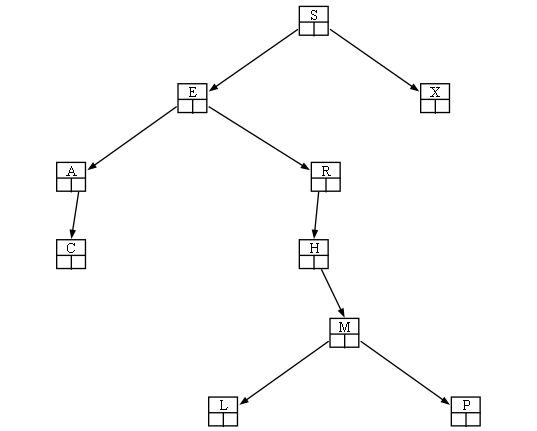

In [ ]:
Image(filename="sbt.dot.png") 

In [5]:
!dot graphadj.dot -Tpng -o graphadj.dot.png

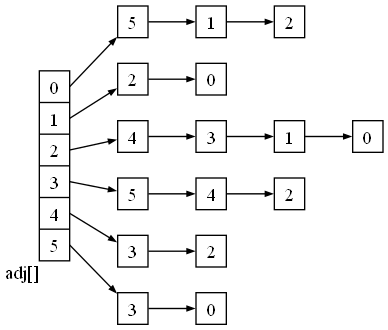

In [6]:
Image(filename="graphadj.dot.png") 

In [7]:
# cleanup
!del sbt.dot.png
!del graphadj.dot.png

# ImageMagick
* https://imagemagick.org/

> ImageMagick® is a free, open-source software suite, used for editing and manipulating digital images. It can be used to create, edit, compose, or convert bitmap images, and supports a wide range of file formats, including JPEG, PNG, GIF, TIFF, and Ultra HDR.

installation: https://imagemagick.org/script/download.php
- Install legacy utilities (e.g. identify)

command line tools: https://legacy.imagemagick.org/script/command-line-tools.php

# GraphvizAnim
* https://github.com/mapio/GraphvizAnim

> GraphvizAnim is a tool to create simple animated graph visualizations; it is just a proof of concept, aimed mainly at teaching purposes. It is based on Graphviz for the graph rendering part and on ImageMagick for the animated gif generation. You can run the heap sort animation on-line using binder.
>
> A graph animation is just a sequence of **steps**, a step is in turn one or more actions such as: add, hilight, label, unlabel or remove a node, and add, hilight, or remove an edge. Animations can be built by invoking suitable methods of a `gvanim.Animation` object (in a Python program), or by parsing a simple text file (that, in turn, can be generated by a program in any language).

Need more features:
- 无向图
- 动画轨迹
- 布局调整

install ImageMagick

In [4]:
!mogrify -version

Version: ImageMagick 7.1.1-47 Q16-HDRI x64 82572af:20250329 https://imagemagick.org
Copyright: (C) 1999 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Features: Channel-masks(64-bit) Cipher DPC HDRI Modules OpenCL OpenMP(2.0) 
Delegates (built-in): bzlib cairo flif freetype gslib heic jng jp2 jpeg jxl lcms lqr lzma openexr pangocairo png ps raqm raw rsvg tiff webp xml zip zlib
Compiler: Visual Studio 2022 (194334808)


In [9]:
!convert -version

Version: ImageMagick 6.9.13-25 Q16-HDRI x64 10f84a865:20250329 https://legacy.imagemagick.org
Copyright: (C) 1999 ImageMagick Studio LLC
License: https://imagemagick.org/script/license.php
Visual C++: 194334808
Features: Cipher DPC HDRI OpenCL OpenMP(2.0) 
Delegates (built-in): bzlib cairo freetype gslib heic jng jp2 jpeg lcms lqr lzma openexr pangocairo png ps raqm raw rsvg tiff webp xml zlib


In [1]:
!pip install GraphvizAnim

In [ ]:
from random import sample
# [i for i in range(6)]
# [0, 1, 2, 3, 4, 5]

sample(range(6), 3)
# [1, 2, 4]

[1, 2, 4]

## example: dfv.py

In [50]:
from random import sample
from gvanim import Animation, render, gif

N = range( 6 )
K = 3

G = dict( ( v, sample( N, K ) ) for v in N )
print(G)

# https://github.com/mapio/GraphvizAnim/blob/master/gvanim/animation.py
ga = Animation()
for v, adj in G.items():
    for u in adj:
        ga.add_edge( v, u ) # 添加边
# 下一步骤
ga.next_step()

seen = [ False for v in  N ]
def dfv( v ):
    ga.highlight_node( v ) # 高亮节点
    ga.next_step()         # 下一步骤
    seen[ v ] = True
    for u in G[ v ]:
        if not seen[ u ]:
            ga.highlight_node( v )    # 高亮节点
            ga.highlight_edge( v, u ) # 高亮边
            ga.next_step()            # 下一步骤
            dfv( u )

dfv( 0 )

graphs = ga.graphs()
files = render( graphs, 'dfv', 'png' )
print(files)
# https://github.com/mapio/GraphvizAnim/blob/master/gvanim/render.py
gif( files, 'dfv', 50 )

{0: [1, 3, 5], 1: [0, 5, 2], 2: [3, 0, 2], 3: [4, 5, 1], 4: [0, 4, 1], 5: [0, 5, 1]}
['dfv_000.png', 'dfv_001.png', 'dfv_002.png', 'dfv_003.png', 'dfv_004.png', 'dfv_005.png', 'dfv_006.png', 'dfv_007.png', 'dfv_008.png', 'dfv_009.png', 'dfv_010.png', 'dfv_011.png', 'dfv_012.png']


In [51]:
cmd = 'convert '
for file in files:
  cmd = cmd + " -delay 100 " + file
cmd = cmd + ' -write dfv.gif'
print(cmd)

convert  -delay 100 dfv_000.png -delay 100 dfv_001.png -delay 100 dfv_002.png -delay 100 dfv_003.png -delay 100 dfv_004.png -delay 100 dfv_005.png -delay 100 dfv_006.png -delay 100 dfv_007.png -delay 100 dfv_008.png -delay 100 dfv_009.png -delay 100 dfv_010.png -delay 100 dfv_011.png -delay 100 dfv_012.png -write dfv.gif


In [52]:
!{cmd}

convert.exe: missing an image filename `dfv.gif' @ error/convert.c/ConvertImageCommand/3231.


In [ ]:
# !convert  -delay 100 dfv_000.png -delay 100 dfv_001.png -delay 100 dfv_002.png -delay 100 dfv_003.png -delay 100 dfv_004.png -delay 100 dfv_005.png -delay 100 dfv_006.png -delay 100 dfv_007.png -delay 100 dfv_008.png -delay 100 dfv_009.png -delay 100 dfv_010.png -delay 100 dfv_011.png -delay 100 dfv_012.png dfv.gif

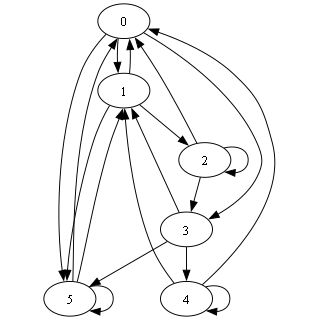

In [53]:
Image(filename="dfv.gif") 

In [54]:
# 清理
for file in files:
  !del {file}

!del dfv.gif

## example: simple.txt

In [ ]:
# action2method = {
# 	'ns' : self.next_step,       # 下一步
# 	'an' : self.add_node,        # 添加节点
# 	'hn' : self.highlight_node,  # 高亮节点
# 	'ln' : self.label_node,      # 添加节点标签
# 	'un' : self.unlabel_node,    # 移除节点标签
# 	'rn' : self.remove_node,     # 删除节点
# 	'ae' : self.add_edge,        # 添加边
# 	'he' : self.highlight_edge,  # 高亮边
# 	'le' : self.label_edge,      # 添加边标签
# 	'ue' : self.unlabel_edge,    # 移除边标签
# 	're' : self.remove_edge,     # 删除边
# }
# 
# https://github.com/mapio/GraphvizAnim/blob/master/gvanim/__main__.py
!python -m gvanim simple.txt simple

Invalid Parameter - 100


In [31]:
# from argparse import ArgumentParser, FileType
from sys import stdin
from gvanim import Animation, render, gif

# parser = ArgumentParser( prog = 'gvanim' )
# parser.add_argument( 'animation', nargs = '?', type = FileType( 'r' ), default = stdin, help = 'The file containing animation commands (default: stdin)' )
# parser.add_argument( '--delay', '-d', default = '100', help = 'The delay (in ticks per second, default: 100)' )
# parser.add_argument( 'basename', help = 'The basename of the generated file' )
# args = parser.parse_args()


ga = Animation()
# ga.parse( args.animation )
with open('simple.txt') as f:
  ga.parse( f.readlines() )
  # gif( render( ga.graphs(), args.basename, 'png' ), args.basename, args.delay )
  files = render( ga.graphs(), 'simple', 'png')
  # 存在前面的图片未删除干净的问题
  cmd = 'convert -dispose 3'
  
  for file in files:
    cmd = cmd + " -delay 100 " + file
  
  cmd = cmd + ' -write simple.gif'
  print(cmd)
  !{cmd}


convert -dispose 3 -delay 100 simple_000.png -delay 100 simple_001.png -delay 100 simple_002.png -delay 100 simple_003.png -delay 100 simple_004.png -write simple.gif


convert.exe: missing an image filename `simple.gif' @ error/convert.c/ConvertImageCommand/3231.


In [7]:
# Image(filename="simple.gif") 

# WARN: 结果gif图片显示不符合预期

In [33]:
# 清理
for file in files:
  !del {file}

!del simple.gif

## example: jupyter <- this one

In [5]:
from gvanim import Animation
from gvanim.jupyter import interactive

ga = Animation()
with open('simple.txt') as f:
  ga.parse( f.readlines() )

interactive(ga, 400)

interactive(children=(IntSlider(value=0, description='n', max=4), Output()), _dom_classes=('widget-interact',)…

## 自定义render

In [ ]:
# from argparse import ArgumentParser, FileType
from sys import stdin
from gvanim import Animation
from anim.gvanim_render import render, gif

# parser = ArgumentParser( prog = 'gvanim' )
# parser.add_argument( 'animation', nargs = '?', type = FileType( 'r' ), default = stdin, help = 'The file containing animation commands (default: stdin)' )
# parser.add_argument( '--delay', '-d', default = '100', help = 'The delay (in ticks per second, default: 100)' )
# parser.add_argument( 'basename', help = 'The basename of the generated file' )
# args = parser.parse_args()


ga = Animation()
# ga.parse( args.animation )
with open('simple.txt') as f:
  ga.parse( f.readlines() )
  # gif( render( ga.graphs(), args.basename, 'png' ), args.basename, args.delay )
  files = render( ga.graphs(), 'simple', 'png')
  # WARN: 没有执行
  # gif(files, 'simple', 100)


['digraph G {\n"a \\"node\\"" ;\n"4" [style=invis];\n"1" ;\n"2" ;\n"1" -> "4" [style=invis];\n"1" -> "a \\"node\\"" ;\n"1" -> "2" [label="an \\"edge\\""];\n"2" -> "a \\"node\\"" ;\n}', 'digraph G {\n"a \\"node\\"" ;\n"4" [style=invis];\n"1" [color=red];\n"2" ;\n"1" -> "4" [style=invis];\n"1" -> "a \\"node\\"" ;\n"1" -> "2" [label="an \\"edge\\""];\n"2" -> "a \\"node\\"" ;\n}', 'digraph G {\n"a \\"node\\"" ;\n"4" [style=invis];\n"1" ;\n"2" [label="foo \\"bar\\"", color=red];\n"1" -> "4" [style=invis];\n"1" -> "a \\"node\\"" ;\n"1" -> "2" ;\n"2" -> "a \\"node\\"" ;\n}', 'digraph G {\n"a \\"node\\"" [color=red];\n"4" ;\n"1" ;\n"2" [label="foo \\"bar\\""];\n"1" -> "4" ;\n"1" -> "a \\"node\\"" ;\n"1" -> "2" ;\n"2" -> "a \\"node\\"" ;\n}', 'digraph G {\n"a \\"node\\"" ;\n"4" ;\n"1" ;\n"2" ;\n"1" -> "4" ;\n"1" -> "a \\"node\\"" ;\n"1" -> "2" ;\n"2" -> "a \\"node\\"" ;\n}'] simple png
<bound method Pool.map of <multiprocessing.pool.Pool state=RUN pool_size=20>>


In [3]:
!{' '.join(['convert', '-dispose', '3', '-delay', '100', 'simple_000.png', '-delay', '100', 'simple_001.png', '-delay', '100', 'simple_002.png', '-delay', '100', 'simple_003.png', '-delay', '100', 'simple_004.png', '-write', 'simple.gif'])}

convert.exe: missing an image filename `simple.gif' @ error/convert.c/ConvertImageCommand/3231.


In [6]:
# from IPython.display import Image
# Image(filename="simple.gif")

# WARN: 结果gif图片显示不符合预期

In [8]:
# 清理
for file in files:
  !del {file}

!del simple.gif

## final

In [2]:
from gvanim import Animation
from gvanim.jupyter import interactive

ga = Animation()

actions = ['ae 1 2',
  'ae 1 "a \"node\""',
  'ae 2 "a \"node\""',
  'le 1 2 "an \"edge\""',
  'ns',
  'hn 1',
  'ns',
  'hn 2',
  'ln 2 "foo \"bar\""',
  'ue 1 2',
  'ns',
  'hn "a \"node\""',
  '# this is a comment',
  'ae 1 4',
  'ns',
  'un 2']

ga.parse(actions)

interactive(ga, 400)

interactive(children=(IntSlider(value=0, description='n', max=4), Output()), _dom_classes=('widget-interact',)…